<a href="https://colab.research.google.com/github/didi-a-p/BootcampDataScienceAlura/blob/main/Analisando%20dados%20da%20sa%C3%BAde%20com%20Python%20e%20Pandas/Desafios%20em%20notebooks%20separados/Desafios_Aula_3_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker

In [2]:
pd.options.display.float_format = "{:.2f}".format

In [3]:
url = "https://raw.githubusercontent.com/didi-a-p/BootcampDataScienceAlura/main/Analisando%20dados%20da%20sa%C3%BAde%20com%20Python%20e%20Pandas/dados/A160324189_28_143_208.csv"

In [4]:
dados = pd.read_csv(url, sep=";", skiprows=3, skipfooter=12, encoding="ISO-8859-1",engine='python',thousands='.', decimal=',')

In [5]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")


In [6]:
usaveis = dados[colunas_usaveis]


In [7]:
usaveis = usaveis.set_index("Unidade da Federação")


In [8]:
usaveis = usaveis.drop("Total", axis=1)


# Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

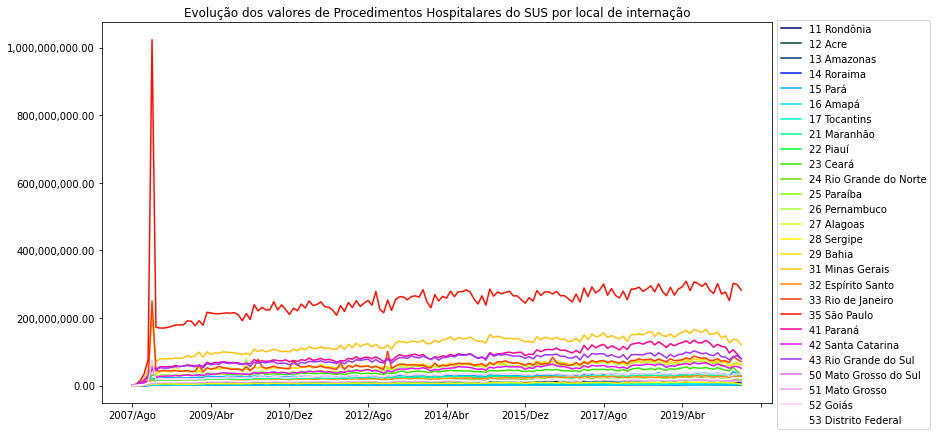

In [9]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html  paleta de cores

ax = usaveis.T.plot(figsize=(12,7), cmap = 'gist_ncar',)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #"{:.2f}"
plt.title("Evolução dos valores de Procedimentos Hospitalares do SUS por local de internação")
plt.show()

# Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [10]:
usaveis['Total'] = usaveis.sum(axis=1)


In [11]:
regioes = {'11 Rondônia' : 'Norte','12 Acre' : 'Norte','13 Amazonas' : 'Norte','14 Roraima' : 'Norte',
           '15 Pará' : 'Norte','16 Amapá' : 'Norte','17 Tocantins' : 'Norte',
           '21 Maranhão' : 'Nordeste','22 Piauí' : 'Nordeste','23 Ceará' : 'Nordeste',
           '24 Rio Grande do Norte' : 'Nordeste','25 Paraíba' : 'Nordeste','26 Pernambuco' : 'Nordeste',
           '27 Alagoas' : 'Nordeste','28 Sergipe' : 'Nordeste','29 Bahia' : 'Nordeste',
           '31 Minas Gerais' : 'Sudeste','32 Espírito Santo' : 'Sudeste','33 Rio de Janeiro' : 'Sudeste',
           '35 São Paulo' : 'Sudeste',
           '41 Paraná' : 'Sul','42 Santa Catarina' : 'Sul','43 Rio Grande do Sul' : 'Sul',
           '50 Mato Grosso do Sul' : 'Centroeste','51 Mato Grosso' : 'Centroeste','52 Goiás' : 'Centroeste',
           '53 Distrito Federal' : 'Centroeste',}

In [12]:
reg=[]
for i in usaveis.index:
  reg.append(regioes[i])

reg

['Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Norte',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Nordeste',
 'Sudeste',
 'Sudeste',
 'Sudeste',
 'Sudeste',
 'Sul',
 'Sul',
 'Sul',
 'Centroeste',
 'Centroeste',
 'Centroeste',
 'Centroeste']

In [13]:
usaveis_regioes = usaveis
usaveis_regioes['Regiões'] = reg
usaveis_regioes.sample(5)[usaveis_regioes.columns[-3:]]

,2020/Jul,Total,Regiões
Unidade da Federação,,,
35 São Paulo,282709570.31,38779063638.12,Sudeste
43 Rio Grande do Sul,78929703.81,11930181093.98,Sul
11 Rondônia,7407388.24,925572673.82,Norte
23 Ceará,30809221.22,6182786402.04,Nordeste
33 Rio de Janeiro,71540227.33,9659938007.12,Sudeste


# Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

In [14]:
ordenado_por_total = usaveis.sort_values("Total", ascending= False)

In [15]:
ordenado_col_interessadas = ordenado_por_total[ordenado_por_total.columns[6:]]


In [16]:
ordenado_col_interessadas.head().T.iloc[:-2]

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro
2008/Fev,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19
2008/Mar,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52
2008/Abr,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86
2008/Mai,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46
2008/Jun,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77
...,...,...,...,...,...
2020/Mar,276606288.92,147078556.29,114476997.52,84651396.59,73594497.93
2020/Abr,251696362.66,126330649.86,96727112.19,76294596.96,68160773.35
2020/Mai,302857660.98,136867275.75,106103737.62,86076113.42,86281033.16
2020/Jun,299060851.62,135977571.87,92901461.36,89019478.82,77604925.21


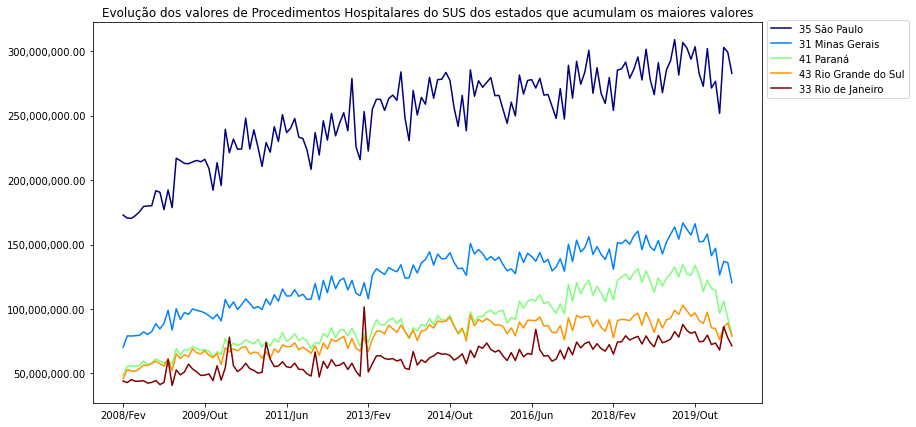

In [17]:
ax = ordenado_col_interessadas.head().T.iloc[:-2].plot(figsize=(12,7), cmap = 'jet')

plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #"{:.2f}"
plt.title("Evolução dos valores de Procedimentos Hospitalares do SUS dos estados que acumulam os maiores valores")
plt.show()

# Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente



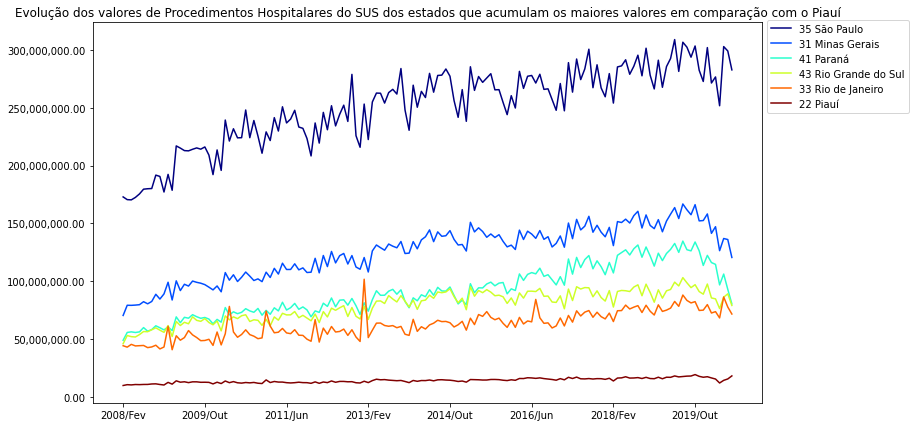

In [18]:
ax = ordenado_col_interessadas.head().append(ordenado_col_interessadas.loc["22 Piauí"]).T.iloc[:-2].plot(figsize=(12,7),
                                                                                                         cmap = 'jet')

plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #"{:.2f}"
plt.title("Evolução dos valores de Procedimentos Hospitalares do SUS dos estados que acumulam os maiores valores em comparação com o Piauí")
plt.show()

# Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

## Preparando os Dados

In [19]:
url_dengue = "https://raw.githubusercontent.com/didi-a-p/BootcampDataScienceAlura/main/Analisando%20dados%20da%20sa%C3%BAde%20com%20Python%20e%20Pandas/dados/DUENGUE.csv"

In [20]:
dengue = pd.read_csv(url_dengue,
                    sep=";",
                    skiprows=4,
                    skipfooter=7,
                    encoding="ISO-8859-1",
                    engine='python',
                    thousands='.',
                    decimal=',',
                   )
dengue.head()

,Região/Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,-,4,12,40,177,848,2027,2073,2116,2242,1189,628,436,426,344,321,489,593,1078,1485,1799,1388,994,678,504,437,351,516,1028,1712,2291,1928,1793,1483,1255,1061,819,887,853,...,148,155,221,235,192,106,78,83,96,124,117,177,289,309,330,339,289,191,155,103,106,139,241,290,428,449,338,144,98,85,49,46,34,48,84,182,151,202,128,101277
1,.. Rondônia,-,-,-,-,2,77,202,237,237,208,67,29,22,21,19,11,44,49,169,278,469,372,293,136,120,131,126,266,667,1254,1600,1026,513,342,171,98,65,55,70,...,44,43,52,56,42,16,17,12,15,25,12,15,30,17,39,33,39,38,52,21,20,28,50,73,96,103,115,43,33,35,16,8,13,16,13,21,11,16,3,23070
2,.. Acre,-,-,-,-,1,3,15,13,12,26,18,6,5,1,7,7,9,35,115,155,120,63,33,24,20,10,6,19,33,65,96,161,146,102,54,22,15,8,9,...,14,18,12,13,9,12,6,8,11,32,39,44,48,25,30,18,16,11,13,9,19,25,45,82,100,81,27,10,7,4,6,6,6,8,29,107,81,101,51,4927
3,.. Amazonas,-,-,-,-,1,61,175,246,247,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,41,67,76,62,67,56,...,4,1,3,5,10,9,5,2,6,5,1,6,7,7,12,3,9,8,5,3,3,8,37,59,38,44,40,20,13,23,21,18,6,14,30,36,42,55,52,6520
4,.. Roraima,-,-,-,-,-,-,7,13,32,90,107,108,163,194,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,...,-,2,3,-,-,1,2,3,2,4,5,-,5,12,12,2,2,2,8,7,8,26,30,20,27,18,3,-,1,-,1,1,-,-,-,-,-,-,-,4109


In [21]:
# criando um DataFrame para as Regiões
dengue_regiao = dengue.loc[[0,8,18,23,27]]
dengue_regiao.reset_index(drop=True, inplace=True)

In [22]:
dengue_regiao

,Região/Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,-,4,12,40,177,848,2027,2073,2116,2242,1189,628,436,426,344,321,489,593,1078,1485,1799,1388,994,678,504,437,351,516,1028,1712,2291,1928,1793,1483,1255,1061,819,887,853,...,148,155,221,235,192,106,78,83,96,124,117,177,289,309,330,339,289,191,155,103,106,139,241,290,428,449,338,144,98,85,49,46,34,48,84,182,151,202,128,101277
1,Região Nordeste,1,24,41,76,187,515,1639,2490,5181,9845,7042,3285,1482,854,532,539,610,803,1653,3189,6105,5036,3175,2100,1282,859,596,565,710,921,1328,2126,4107,4434,5404,4660,3555,2598,1969,...,368,337,570,843,1140,970,720,465,300,275,258,243,352,607,931,1770,3030,2601,2037,1396,968,715,461,379,502,946,982,942,932,762,569,306,213,153,144,123,174,190,153,289495
2,Região Sudeste,-,-,-,10,36,281,1301,1999,5899,7524,3268,1080,264,142,136,141,199,311,666,1093,1767,1613,1343,690,302,149,94,85,192,369,1063,2446,4236,4563,3739,1409,733,610,407,...,282,304,368,532,442,236,190,129,89,170,226,465,1060,1989,3259,5579,6624,3020,1005,348,228,285,285,480,1556,2537,2140,1353,708,244,134,85,84,86,83,85,162,290,287,189135
3,Região Sul,-,-,-,-,5,9,38,30,64,76,27,9,10,10,8,10,14,15,24,14,37,30,21,3,7,2,4,6,8,15,70,297,732,651,316,68,37,25,29,...,37,39,40,41,20,4,6,3,10,12,25,12,46,117,215,404,476,230,83,29,22,35,94,257,971,2269,2484,1290,462,120,53,30,33,39,41,47,60,98,89,27680
4,Região Centro-Oeste,-,1,3,21,48,203,676,769,1360,1803,828,357,115,84,75,101,84,154,261,370,887,1293,1373,641,381,283,299,463,1219,2456,3945,3898,4003,2740,1663,656,311,221,238,...,538,834,951,974,890,401,176,129,114,136,279,533,713,1086,1596,2335,2574,1515,503,226,196,205,217,469,1452,2118,1967,1166,791,382,181,95,82,77,104,116,157,239,143,118327


In [23]:
# Criando um DataFrame para as Unidades da Federação (UFs)
dengue_uf = dengue.loc[[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,19,20,21,22,24,25,26,28,29,30,31]]
dengue_uf.reset_index(drop=True, inplace=True)

In [24]:
dengue_uf.head()

,Região/Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,.. Rondônia,-,-,-,-,2,77,202,237,237,208,67,29,22,21,19,11,44,49,169,278,469,372,293,136,120,131,126,266,667,1254,1600,1026,513,342,171,98,65,55,70,...,44,43,52,56,42,16,17,12,15,25,12,15,30,17,39,33,39,38,52,21,20,28,50,73,96,103,115,43,33,35,16,8,13,16,13,21,11,16,3,23070
1,.. Acre,-,-,-,-,1,3,15,13,12,26,18,6,5,1,7,7,9,35,115,155,120,63,33,24,20,10,6,19,33,65,96,161,146,102,54,22,15,8,9,...,14,18,12,13,9,12,6,8,11,32,39,44,48,25,30,18,16,11,13,9,19,25,45,82,100,81,27,10,7,4,6,6,6,8,29,107,81,101,51,4927
2,.. Amazonas,-,-,-,-,1,61,175,246,247,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,41,67,76,62,67,56,...,4,1,3,5,10,9,5,2,6,5,1,6,7,7,12,3,9,8,5,3,3,8,37,59,38,44,40,20,13,23,21,18,6,14,30,36,42,55,52,6520
3,.. Roraima,-,-,-,-,-,-,7,13,32,90,107,108,163,194,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,...,-,2,3,-,-,1,2,3,2,4,5,-,5,12,12,2,2,2,8,7,8,26,30,20,27,18,3,-,1,-,1,1,-,-,-,-,-,-,-,4109
4,.. Pará,-,4,12,38,163,610,1374,1326,1276,1392,782,429,204,167,181,218,342,370,547,754,896,688,457,364,254,170,115,151,220,236,330,431,703,636,613,557,471,604,635,...,74,81,112,133,100,56,44,53,55,47,44,56,101,128,151,168,150,76,60,51,48,45,70,46,136,178,137,54,36,18,3,13,8,8,11,16,16,29,21,51244


### Por Unidade da Federação (UF)

In [25]:
# limpando o nome dos estados
nomes_uf = []
for i in dengue_uf['Região/Unidade da Federação']:
    x = i.replace(".. ", "")
    nomes_uf.append(x)
    
dengue_uf['Região/Unidade da Federação'] = nomes_uf
dengue_uf.head()

,Região/Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,-,-,-,-,2,77,202,237,237,208,67,29,22,21,19,11,44,49,169,278,469,372,293,136,120,131,126,266,667,1254,1600,1026,513,342,171,98,65,55,70,...,44,43,52,56,42,16,17,12,15,25,12,15,30,17,39,33,39,38,52,21,20,28,50,73,96,103,115,43,33,35,16,8,13,16,13,21,11,16,3,23070
1,Acre,-,-,-,-,1,3,15,13,12,26,18,6,5,1,7,7,9,35,115,155,120,63,33,24,20,10,6,19,33,65,96,161,146,102,54,22,15,8,9,...,14,18,12,13,9,12,6,8,11,32,39,44,48,25,30,18,16,11,13,9,19,25,45,82,100,81,27,10,7,4,6,6,6,8,29,107,81,101,51,4927
2,Amazonas,-,-,-,-,1,61,175,246,247,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,41,67,76,62,67,56,...,4,1,3,5,10,9,5,2,6,5,1,6,7,7,12,3,9,8,5,3,3,8,37,59,38,44,40,20,13,23,21,18,6,14,30,36,42,55,52,6520
3,Roraima,-,-,-,-,-,-,7,13,32,90,107,108,163,194,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,...,-,2,3,-,-,1,2,3,2,4,5,-,5,12,12,2,2,2,8,7,8,26,30,20,27,18,3,-,1,-,1,1,-,-,-,-,-,-,-,4109
4,Pará,-,4,12,38,163,610,1374,1326,1276,1392,782,429,204,167,181,218,342,370,547,754,896,688,457,364,254,170,115,151,220,236,330,431,703,636,613,557,471,604,635,...,74,81,112,133,100,56,44,53,55,47,44,56,101,128,151,168,150,76,60,51,48,45,70,46,136,178,137,54,36,18,3,13,8,8,11,16,16,29,21,51244


In [26]:
dengue_uf_2 = dengue_uf[dengue_uf.columns[1:-1]].replace("-", 0)
dengue_uf_2 = dengue_uf_2.set_index(dengue_uf['Região/Unidade da Federação'])

In [27]:
# Transformando strings em numeros
def converter_valores(df):
    df2 = df
    cols = df2.columns
    for c in cols:
        df2[c] = pd.to_numeric(df2[c])
    return df2

In [28]:
dengue_uf_2 = converter_valores(dengue_uf_2)

In [29]:
dengue_uf_2.head()

,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,0,0,0,0,2,77,202,237,237,208,67,29,22,21,19,11,44,49,169,278,469,372,293,136,120,131,126,266,667,1254,1600,1026,513,342,171,98,65,55,70,95,...,29,44,43,52,56,42,16,17,12,15,25,12,15,30,17,39,33,39,38,52,21,20,28,50,73,96,103,115,43,33,35,16,8,13,16,13,21,11,16,3
Acre,0,0,0,0,1,3,15,13,12,26,18,6,5,1,7,7,9,35,115,155,120,63,33,24,20,10,6,19,33,65,96,161,146,102,54,22,15,8,9,31,...,7,14,18,12,13,9,12,6,8,11,32,39,44,48,25,30,18,16,11,13,9,19,25,45,82,100,81,27,10,7,4,6,6,6,8,29,107,81,101,51
Amazonas,0,0,0,0,1,61,175,246,247,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,41,67,76,62,67,56,69,...,3,4,1,3,5,10,9,5,2,6,5,1,6,7,7,12,3,9,8,5,3,3,8,37,59,38,44,40,20,13,23,21,18,6,14,30,36,42,55,52
Roraima,0,0,0,0,0,0,7,13,32,90,107,108,163,194,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,24,...,0,0,2,3,0,0,1,2,3,2,4,5,0,5,12,12,2,2,2,8,7,8,26,30,20,27,18,3,0,1,0,1,1,0,0,0,0,0,0,0
Pará,0,4,12,38,163,610,1374,1326,1276,1392,782,429,204,167,181,218,342,370,547,754,896,688,457,364,254,170,115,151,220,236,330,431,703,636,613,557,471,604,635,738,...,56,74,81,112,133,100,56,44,53,55,47,44,56,101,128,151,168,150,76,60,51,48,45,70,46,136,178,137,54,36,18,3,13,8,8,11,16,16,29,21


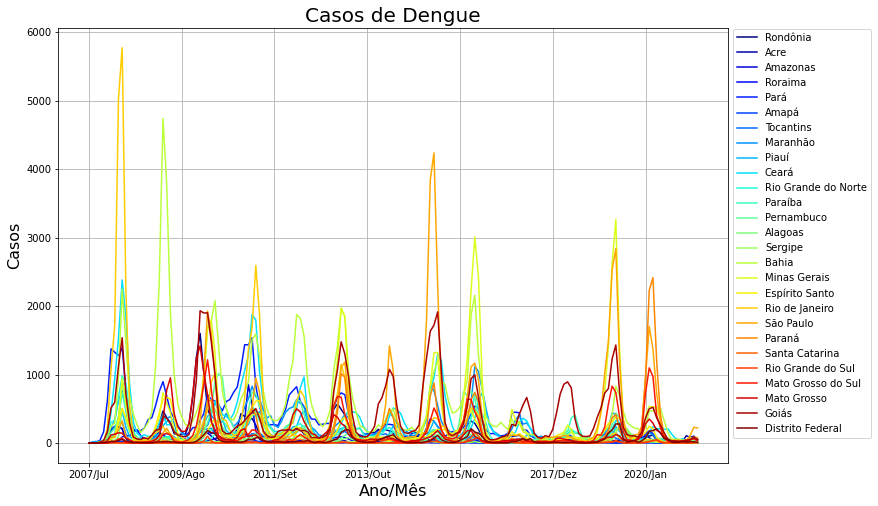

In [40]:
ax = dengue_uf_2.T.plot(figsize=(12,8), cmap=plt.get_cmap('jet'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.set_xlabel('Ano/Mês', fontsize=16)
ax.set_ylabel('Casos', fontsize=16)
plt.title('Casos de Dengue por UF', fontsize=20)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1.01))
plt.show()

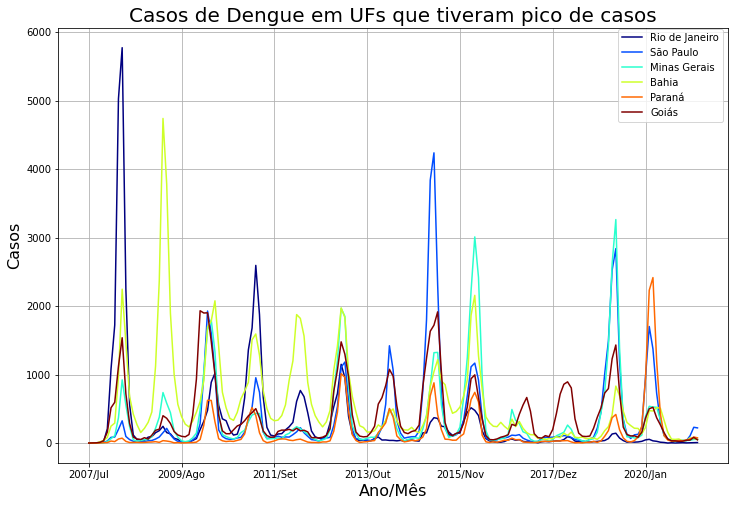

In [41]:
estados_escolhidos = ['Rio de Janeiro', 'São Paulo', 'Minas Gerais', 'Bahia', 'Paraná', 'Goiás']

ax = dengue_uf_2.loc[estados_escolhidos].T.plot(figsize=(12,8), cmap=plt.get_cmap('jet'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.set_xlabel('Ano/Mês', fontsize=16)
ax.set_ylabel('Casos', fontsize=16)
plt.title('Casos de Dengue em UFs que tiveram pico de casos', fontsize=20)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1.01))
plt.show()

### Por região

In [31]:
dengue_regiao.head()

,Região/Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,-,4,12,40,177,848,2027,2073,2116,2242,1189,628,436,426,344,321,489,593,1078,1485,1799,1388,994,678,504,437,351,516,1028,1712,2291,1928,1793,1483,1255,1061,819,887,853,...,148,155,221,235,192,106,78,83,96,124,117,177,289,309,330,339,289,191,155,103,106,139,241,290,428,449,338,144,98,85,49,46,34,48,84,182,151,202,128,101277
1,Região Nordeste,1,24,41,76,187,515,1639,2490,5181,9845,7042,3285,1482,854,532,539,610,803,1653,3189,6105,5036,3175,2100,1282,859,596,565,710,921,1328,2126,4107,4434,5404,4660,3555,2598,1969,...,368,337,570,843,1140,970,720,465,300,275,258,243,352,607,931,1770,3030,2601,2037,1396,968,715,461,379,502,946,982,942,932,762,569,306,213,153,144,123,174,190,153,289495
2,Região Sudeste,-,-,-,10,36,281,1301,1999,5899,7524,3268,1080,264,142,136,141,199,311,666,1093,1767,1613,1343,690,302,149,94,85,192,369,1063,2446,4236,4563,3739,1409,733,610,407,...,282,304,368,532,442,236,190,129,89,170,226,465,1060,1989,3259,5579,6624,3020,1005,348,228,285,285,480,1556,2537,2140,1353,708,244,134,85,84,86,83,85,162,290,287,189135
3,Região Sul,-,-,-,-,5,9,38,30,64,76,27,9,10,10,8,10,14,15,24,14,37,30,21,3,7,2,4,6,8,15,70,297,732,651,316,68,37,25,29,...,37,39,40,41,20,4,6,3,10,12,25,12,46,117,215,404,476,230,83,29,22,35,94,257,971,2269,2484,1290,462,120,53,30,33,39,41,47,60,98,89,27680
4,Região Centro-Oeste,-,1,3,21,48,203,676,769,1360,1803,828,357,115,84,75,101,84,154,261,370,887,1293,1373,641,381,283,299,463,1219,2456,3945,3898,4003,2740,1663,656,311,221,238,...,538,834,951,974,890,401,176,129,114,136,279,533,713,1086,1596,2335,2574,1515,503,226,196,205,217,469,1452,2118,1967,1166,791,382,181,95,82,77,104,116,157,239,143,118327


In [32]:
dengue_regiao_2 = dengue_regiao[dengue_regiao.columns[1:-1]].replace("-", 0)
dengue_regiao_2 = dengue_regiao_2.set_index(dengue_regiao['Região/Unidade da Federação'])
dengue_regiao_2 = converter_valores(dengue_regiao_2)

In [33]:
dengue_regiao_2.head()

,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Norte,0,4,12,40,177,848,2027,2073,2116,2242,1189,628,436,426,344,321,489,593,1078,1485,1799,1388,994,678,504,437,351,516,1028,1712,2291,1928,1793,1483,1255,1061,819,887,853,1013,...,100,148,155,221,235,192,106,78,83,96,124,117,177,289,309,330,339,289,191,155,103,106,139,241,290,428,449,338,144,98,85,49,46,34,48,84,182,151,202,128
Região Nordeste,1,24,41,76,187,515,1639,2490,5181,9845,7042,3285,1482,854,532,539,610,803,1653,3189,6105,5036,3175,2100,1282,859,596,565,710,921,1328,2126,4107,4434,5404,4660,3555,2598,1969,1663,...,266,368,337,570,843,1140,970,720,465,300,275,258,243,352,607,931,1770,3030,2601,2037,1396,968,715,461,379,502,946,982,942,932,762,569,306,213,153,144,123,174,190,153
Região Sudeste,0,0,0,10,36,281,1301,1999,5899,7524,3268,1080,264,142,136,141,199,311,666,1093,1767,1613,1343,690,302,149,94,85,192,369,1063,2446,4236,4563,3739,1409,733,610,407,334,...,196,282,304,368,532,442,236,190,129,89,170,226,465,1060,1989,3259,5579,6624,3020,1005,348,228,285,285,480,1556,2537,2140,1353,708,244,134,85,84,86,83,85,162,290,287
Região Sul,0,0,0,0,5,9,38,30,64,76,27,9,10,10,8,10,14,15,24,14,37,30,21,3,7,2,4,6,8,15,70,297,732,651,316,68,37,25,29,25,...,34,37,39,40,41,20,4,6,3,10,12,25,12,46,117,215,404,476,230,83,29,22,35,94,257,971,2269,2484,1290,462,120,53,30,33,39,41,47,60,98,89
Região Centro-Oeste,0,1,3,21,48,203,676,769,1360,1803,828,357,115,84,75,101,84,154,261,370,887,1293,1373,641,381,283,299,463,1219,2456,3945,3898,4003,2740,1663,656,311,221,238,286,...,242,538,834,951,974,890,401,176,129,114,136,279,533,713,1086,1596,2335,2574,1515,503,226,196,205,217,469,1452,2118,1967,1166,791,382,181,95,82,77,104,116,157,239,143


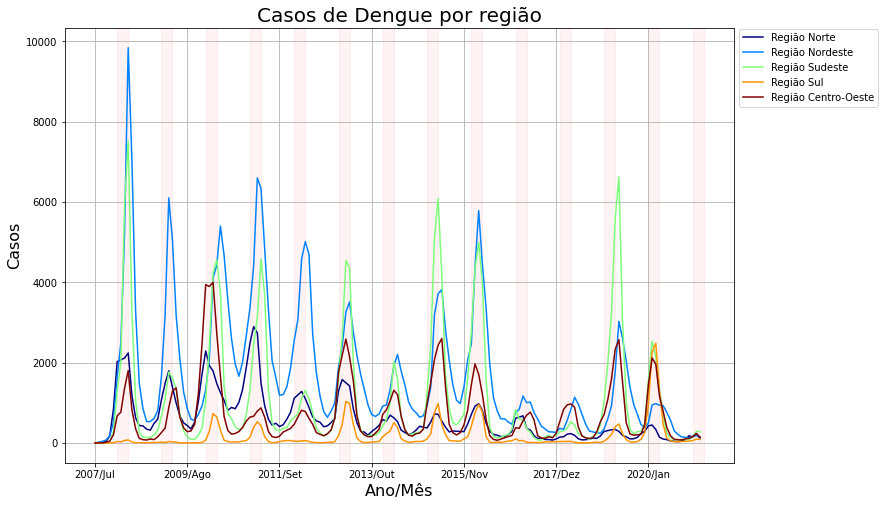

In [34]:
# ideia do destaque do AkiraG - https://github.com/AkiraG/DSBootCamp-Alura/blob/main/M%C3%B3dulos/01/M%C3%B3dulo%2001%20-%20Aulas%20%2B%20Desafios.ipynb

ax = dengue_regiao_2.T.plot(figsize=(12,8), cmap=plt.get_cmap('jet'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.set_xlabel('Ano/Mês', fontsize=16)
ax.set_ylabel('Casos', fontsize=16)
for month in range(0, 165, 12):
    plt.axvspan(month+6, month+9, color='red', alpha=0.05)
plt.title('Casos de Dengue por região', fontsize=20)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1.01))
plt.show()

# Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região



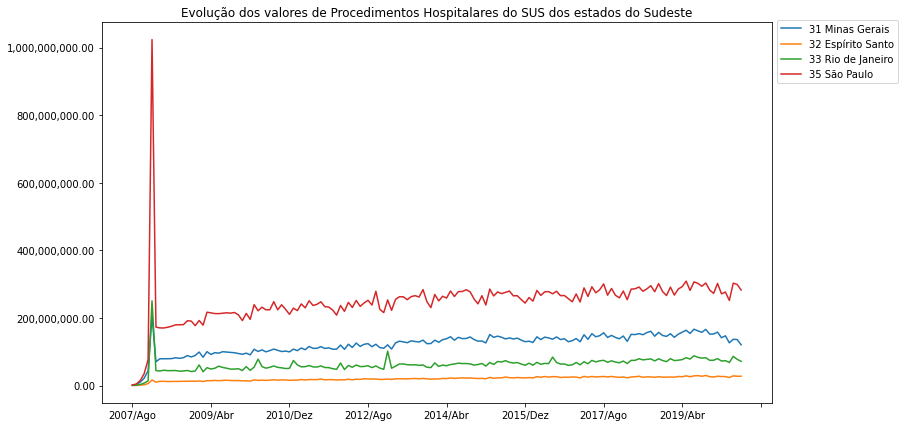

In [35]:
ax = usaveis[usaveis['Regiões'] == 'Sudeste'].T.iloc[:-2].plot(figsize=(12,7),
                                                              #  cmap = 'gist_ncar',
                                                               )

plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #"{:.2f}"
plt.title("Evolução dos valores de Procedimentos Hospitalares do SUS dos estados do Sudeste")
plt.show()

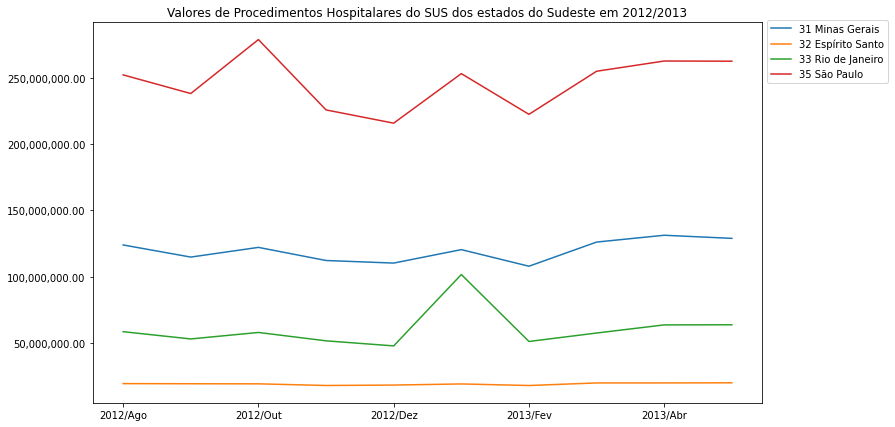

In [36]:
ax = usaveis[usaveis['Regiões'] == 'Sudeste'][usaveis.columns[60:70]].T.plot(figsize=(12,7),)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #"{:.2f}"
plt.title("Valores de Procedimentos Hospitalares do SUS dos estados do Sudeste em 2012/2013")
plt.show()

# Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.



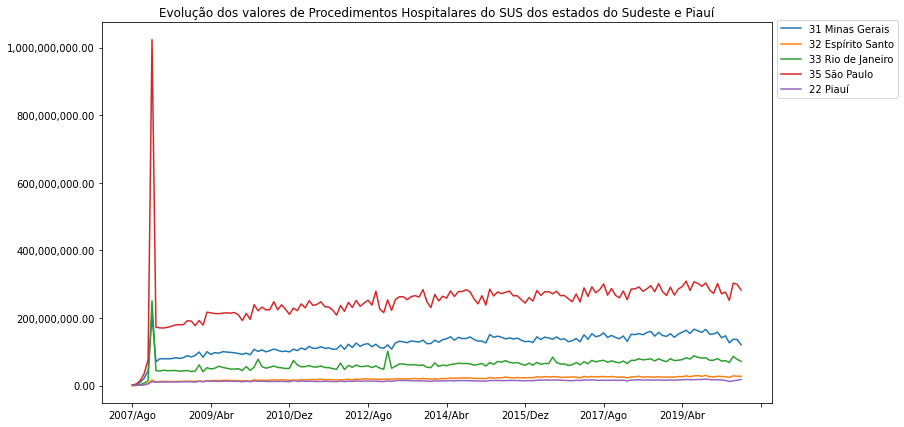

In [37]:
ax = usaveis[usaveis['Regiões'] == 'Sudeste'].append(usaveis.loc['22 Piauí']).T.iloc[:-2].plot(figsize=(12,7),
                                                              #  cmap = 'gist_ncar',
                                                               )

plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #"{:.2f}"
plt.title("Evolução dos valores de Procedimentos Hospitalares do SUS dos estados do Sudeste e Piauí")
plt.show()

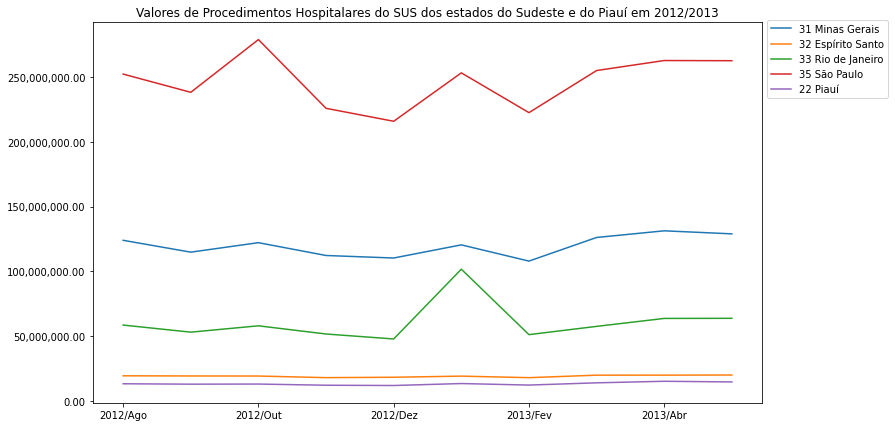

In [38]:
ax = usaveis[usaveis['Regiões'] == 'Sudeste'].append(usaveis.loc['22 Piauí'])[usaveis.columns[60:70]].T.plot(figsize=(12,7),)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) #"{:.2f}"
plt.title("Valores de Procedimentos Hospitalares do SUS dos estados do Sudeste e do Piauí em 2012/2013")
plt.show()